#Linear Regression

##Normal Equation

In [ ]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

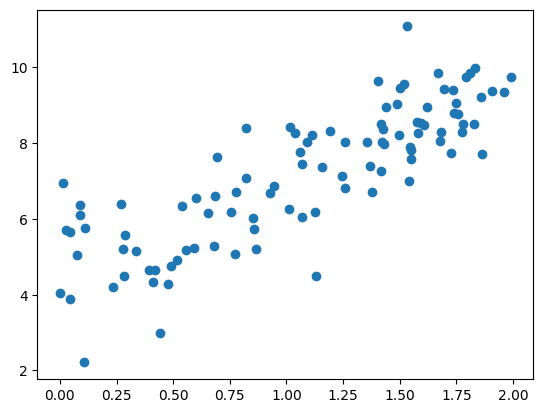

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.41956829],
       [2.55849738]])

In [ ]:
X_b.shape

(100, 2)

In [ ]:
theta_best.shape

(2, 1)

In [ ]:
y_pred = X_b.dot(theta_best)

In [ ]:
y_pred.shape

(100, 1)

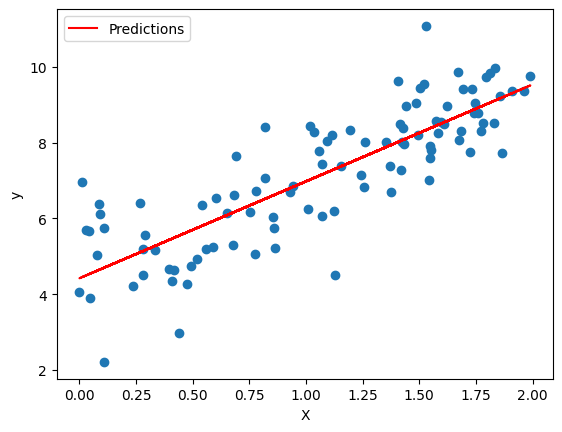

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r-', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Linear Regression Using Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
y_pred_sklearn = lin_reg.predict(X)

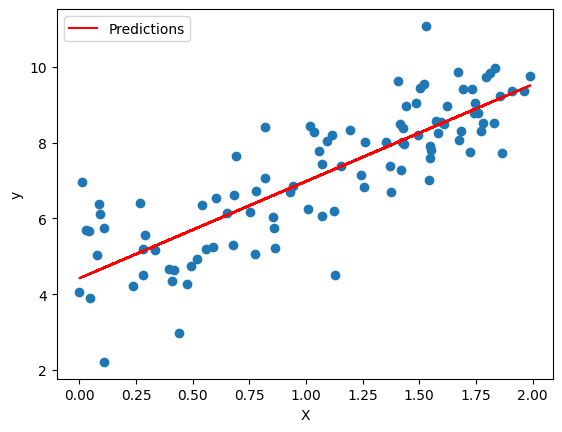

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred_sklearn, 'r-', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.41956829]), array([[2.55849738]]))

#Batch(Full) Gradient Descent

In [ ]:
eta = [0.02, 0.1, 0.5] # learning rate
n_iterations = 20
m = 100

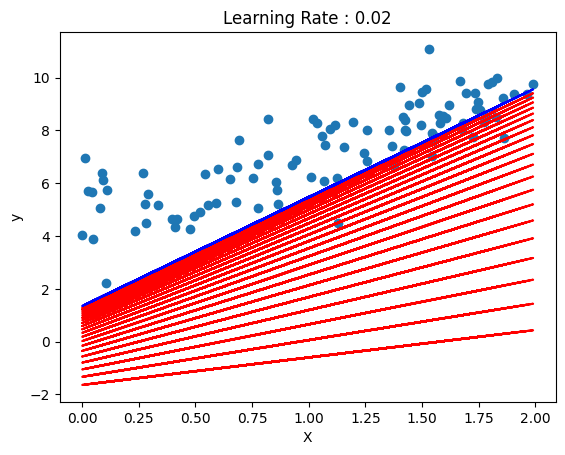

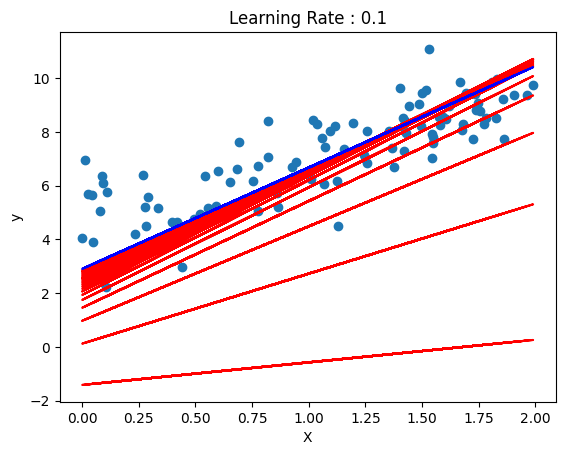

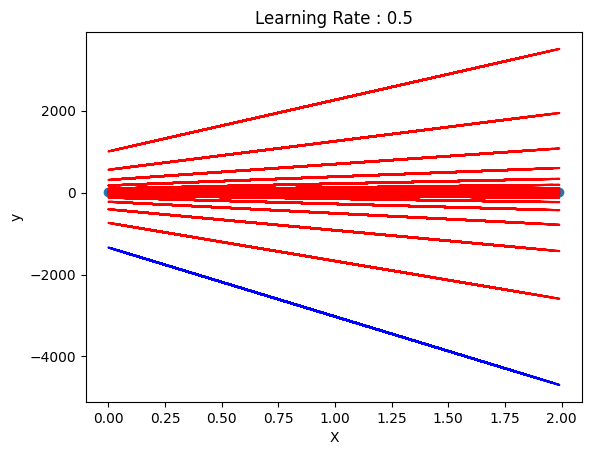

In [ ]:

for eta_ in eta:
  plt.scatter(X, y)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title(f'Learning Rate : {eta_}')
  theta = np.random.randn(2,1)
  y_pred_gd = X_b.dot(theta)

  for iteration in range(n_iterations):
    plt.plot(X, y_pred_gd, 'r-')
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta_ * gradient
    y_pred_gd = X_b.dot(theta)
  plt.plot(X, y_pred_gd, 'b-')
  plt.show()



In [ ]:
theta

array([[-1341.57438933],
       [-1685.07113551]])

#Stochastic(Random Sample) Gradient Descent

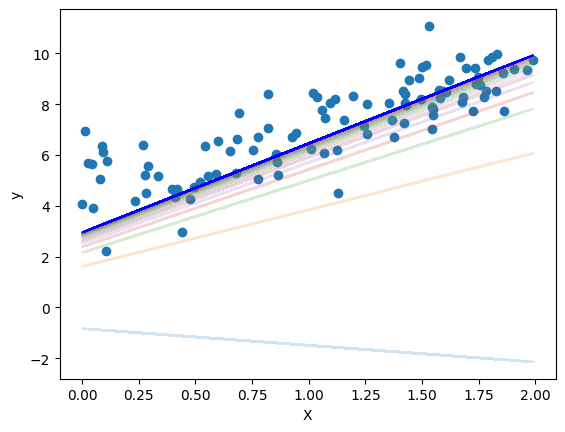

In [ ]:
n_epochs = 20
t0 = 20
t1 = 50
theta = np.random.randn(2, 1)

def learning_schedule(t):
  return t0/(t + t1)

y_pred_sgd = X_b.dot(theta)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')


for epoch in range(n_epochs):
  plt.plot(X, y_pred_sgd, alpha=0.2)
  for i in range(m):
    random_idx = np.random.randint(m)
    Xi = X_b[random_idx : random_idx+1]
    yi = y[random_idx : random_idx+1]
    gradient = 2/m * Xi.T.dot(Xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta*gradient
    y_pred_sgd = X_b.dot(theta)

plt.plot(X, y_pred_sgd, 'b-')
plt.show()

# Polynomial Regression

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

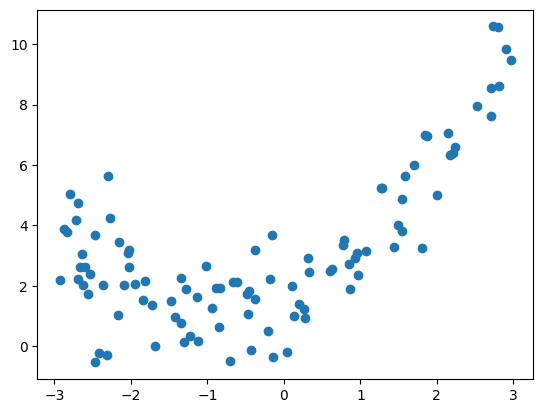

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [ ]:
X_poly.shape

(100, 2)

In [ ]:
X_poly

array([[ 9.27666965e-01,  8.60565998e-01],
       [ 1.80625597e+00,  3.26256062e+00],
       [-1.84536934e+00,  3.40538802e+00],
       [-2.92896785e+00,  8.57885266e+00],
       [ 1.99589032e+00,  3.98357816e+00],
       [ 1.07517908e+00,  1.15601005e+00],
       [ 2.70158903e+00,  7.29858327e+00],
       [-1.13480633e+00,  1.28778540e+00],
       [-2.47515404e+00,  6.12638753e+00],
       [ 6.26214180e-01,  3.92144199e-01],
       [ 8.50188388e-01,  7.22820295e-01],
       [ 1.49220881e+00,  2.22668714e+00],
       [ 2.52881751e+00,  6.39491799e+00],
       [-2.80264359e+00,  7.85481108e+00],
       [-2.03692091e+00,  4.14904678e+00],
       [-6.07216612e-01,  3.68712014e-01],
       [-3.81907176e-01,  1.45853091e-01],
       [-2.63961861e+00,  6.96758642e+00],
       [ 1.09095774e-01,  1.19018879e-02],
       [ 7.91198756e-01,  6.25995472e-01],
       [ 1.32121497e-01,  1.74560899e-02],
       [ 2.96689051e+00,  8.80243930e+00],
       [ 2.02224726e-01,  4.08948396e-02],
       [ 6.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([1.62326063]), array([[1.05215446, 0.58804503]]))

In [ ]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_poly_predict = lin_reg.predict(X_range_poly)

In [ ]:
y_poly_predict.shape

(100, 1)

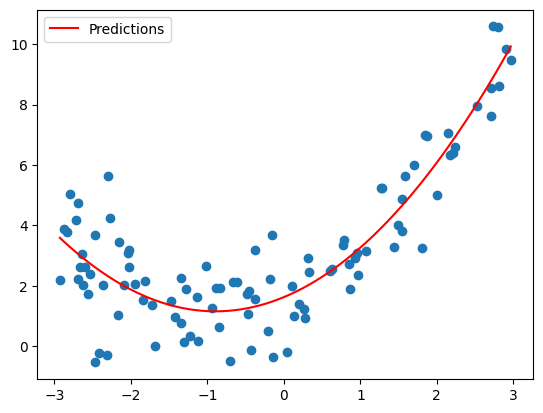

In [ ]:
plt.scatter(X, y)
plt.plot(X_range, y_poly_predict, 'r-', label='Predictions')
plt.legend()
plt.show()

#Overfitting and Underfitting

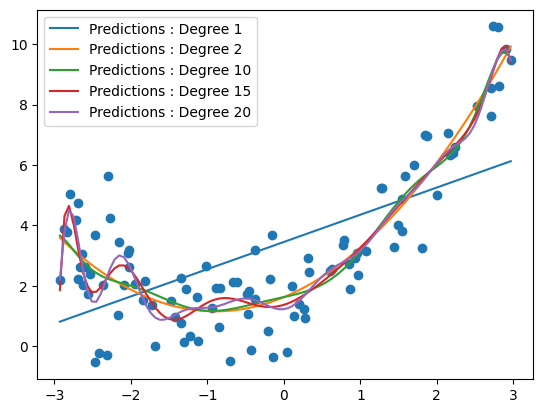

In [ ]:
degrees = [1, 2, 10, 15, 20]

plt.scatter(X, y)
for degree in degrees:
  poly_features = PolynomialFeatures(degree=degree, include_bias=False)
  X_poly = poly_features.fit_transform(X)

  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y)

  #Generate Predictions
  X_range_poly = poly_features.transform(X_range)
  y_pred = lin_reg.predict(X_range_poly)

  plt.plot(X_range, y_pred, label=f'Predictions : Degree {degree}')
plt.legend()
plt.show()

# Regularization

## Ridge regression

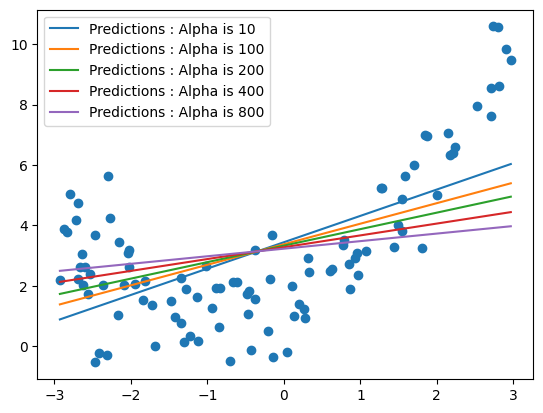

In [ ]:
from sklearn.linear_model import Ridge

alphas = [10, 100, 200, 400, 800]
plt.scatter(X, y)
for alpha in alphas:
  lin_reg = Ridge(alpha=alpha, solver="cholesky")
  lin_reg.fit(X, y)
  y_pred = lin_reg.predict(X_range)
  plt.plot(X_range, y_pred, label=f'Predictions : Alpha is {alpha}')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.72779e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.70295e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


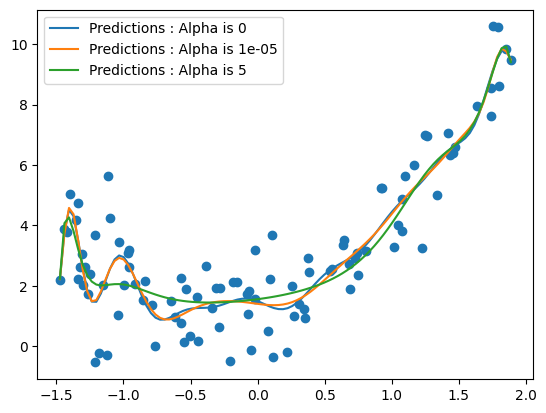

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

alphas = [0, 1e-05, 5]
plt.scatter(X, y)
for alpha in alphas:
  poly_features = PolynomialFeatures(degree=20, include_bias=False)
  X_poly = poly_features.fit_transform(X)

  lin_reg = Ridge(alpha=alpha, solver='cholesky')
  lin_reg.fit(X_poly, y)

  #Generate Predictions
  X_range_poly = poly_features.transform(X_range)
  y_pred = lin_reg.predict(X_range_poly)

  plt.plot(X_range, y_pred, label=f'Predictions : Alpha is {alpha}')
plt.legend()
plt.show()

**Using SGD regressor**

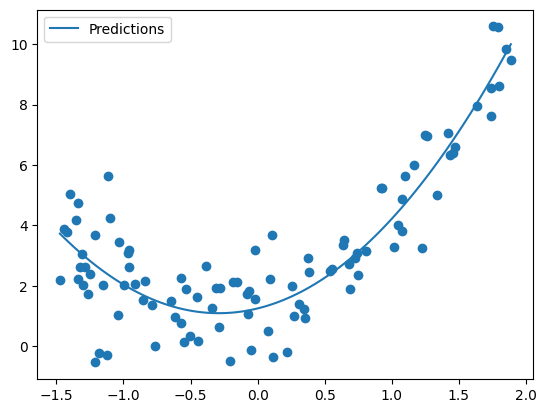

In [ ]:
from sklearn.linear_model import SGDRegressor

plt.scatter(X, y)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = SGDRegressor(penalty='l2')
lin_reg.fit(X_poly, y.ravel())

#Generate Predictions
X_range_poly = poly_features.transform(X_range)
y_pred = lin_reg.predict(X_range_poly)

plt.plot(X_range, y_pred, label=f'Predictions')
plt.legend()
plt.show()


## Lasso Regression

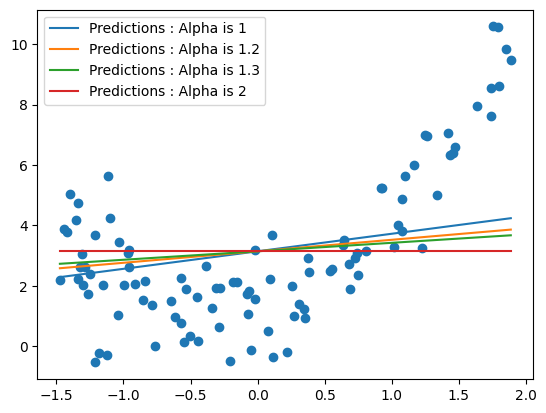

In [ ]:
from sklearn.linear_model import Lasso

alphas = [1, 1.2, 1.3, 2]
plt.scatter(X, y)
for alpha in alphas:
  lin_reg = Lasso(alpha=alpha)
  lin_reg.fit(X, y)
  y_pred = lin_reg.predict(X_range)
  plt.plot(X_range, y_pred, label=f'Predictions : Alpha is {alpha}')
plt.legend()
plt.show()

<ipython-input-235-9f1f2cf31cd8>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lin_reg.fit(X_poly, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.245e+01, tolerance: 6.353e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklear

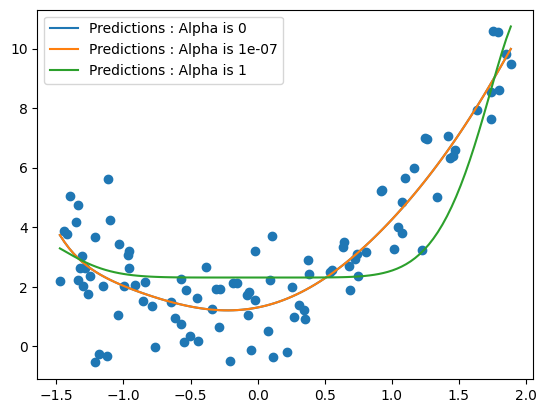

In [ ]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

alphas = [0, 1e-07, 1]
plt.scatter(X, y)
for alpha in alphas:
  poly_features = PolynomialFeatures(degree=10, include_bias=False)
  X_poly = poly_features.fit_transform(X)

  lin_reg = Lasso(alpha=alpha)
  lin_reg.fit(X_poly, y)

  #Generate Predictions
  X_range_poly = poly_features.transform(X_range)
  y_pred = lin_reg.predict(X_range_poly)

  plt.plot(X_range, y_pred, label=f'Predictions : Alpha is {alpha}')
plt.legend()
plt.show()

## Elastic Net

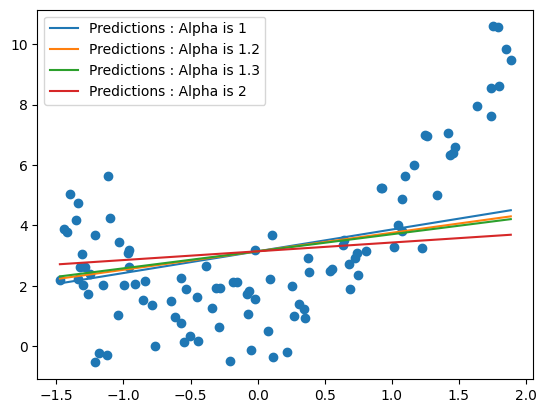

In [ ]:
from sklearn.linear_model import ElasticNet

alphas = [1, 1.2, 1.3, 2]
plt.scatter(X, y)
for alpha in alphas:
  lin_reg = ElasticNet(alpha=alpha, l1_ratio=0.5)
  lin_reg.fit(X, y)
  y_pred = lin_reg.predict(X_range)
  plt.plot(X_range, y_pred, label=f'Predictions : Alpha is {alpha}')
plt.legend()
plt.show()

<ipython-input-237-3f1103e6b975>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lin_reg.fit(X_poly, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.245e+01, tolerance: 6.353e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklear

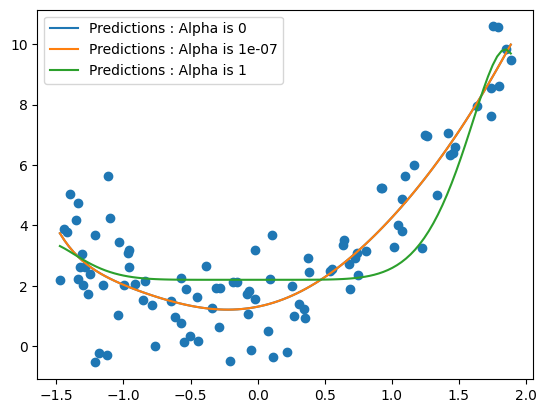

In [ ]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

alphas = [0, 1e-07, 1]
plt.scatter(X, y)
for alpha in alphas:
  poly_features = PolynomialFeatures(degree=10, include_bias=False)
  X_poly = poly_features.fit_transform(X)

  lin_reg = ElasticNet(alpha=alpha, l1_ratio=0.5)
  lin_reg.fit(X_poly, y)

  #Generate Predictions
  X_range_poly = poly_features.transform(X_range)
  y_pred = lin_reg.predict(X_range_poly)

  plt.plot(X_range, y_pred, label=f'Predictions : Alpha is {alpha}')
plt.legend()
plt.show()